We create two vectors for data about the population of China. The first has the years of census data, the other has the numbers of millions of people.

In [1]:
year = 1980:10:2010 
pop = [984.736, 1148.364, 1263.638, 1330.141];

It's convenient to measure time in years since 1980. We use `.-` to subtract a scalar from a vector elementwise.

In [2]:
t = year .- 1980
y = pop;

Now we have four data points $(t_1,y_1),\dots,(t_4,y_4)$, so $n=4$ and we seek an interpolating cubic polynomial. We construct the associated Vandermonde matrix: 

In [3]:
V = [ t[i]^j for i=1:4, j=0:3 ]

4×4 Array{Int64,2}:
 1   0    0      0
 1  10  100   1000
 1  20  400   8000
 1  30  900  27000

To solve for the vector of polynomial coefficients, we use a backslash:

In [4]:
c = V \ y

4-element Array{Float64,1}:
 984.736               
  18.766600000000025   
  -0.2396850000000029  
  -6.949999999992921e-5

The algorithms used by the backslash operator are the main topic of this chapter. For now, observe that the coefficients of the cubic polynomial vary over several orders of magnitude, which is typical in this context. By our definitions, these coefficients are given in ascending order of power in $t$. 

We can use the resulting polynomial to estimate the population of China in 2005:

In [5]:
using Polynomials
p = Poly(c)    # construct a polynomial
p(2005-1980)   # apply the 1980 time shift

1303.0119375

The official figure is 1297.8, so our result is not bad. 

We can visualize the interpolation process. First, we plot the data as points. We'll shift the $t$ variable back to actual years. 

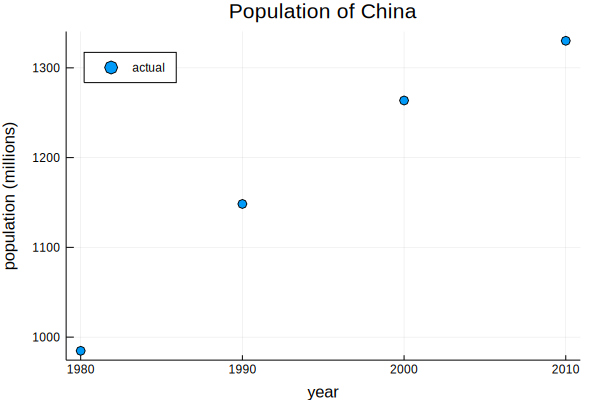

In [6]:
using Plots
plot(1980 .+ t,y,m=:o,l=nothing,label="actual",legend=:topleft,
    xlabel="year",ylabel="population (millions)",title="Population of China")

We want to superimpose a plot of the polynomial. We do that by evaluating it at a lot of points in the interval. Note the use of `plot!` to add to the current plot, rather than replacing it. 

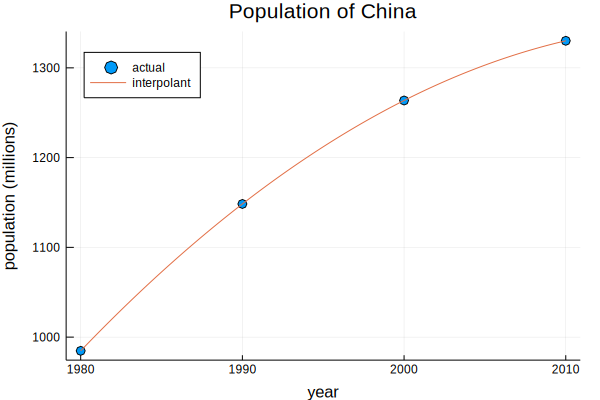

In [7]:
tt = range(0,stop=30,length=300)   # 300 times from 1980 to 2010
plot!(1980 .+ tt,p(tt),label="interpolant")

Let's redo it, this time continuing the curve outside of the original date range. 

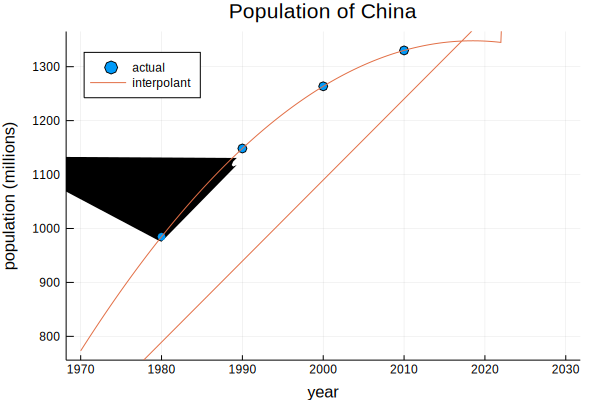

In [8]:
plot(1980 .+ t,y,m=:o,l=nothing,label="actual",legend=:topleft,
    xlabel="year",ylabel="population (millions)",title="Population of China")

tt = range(-10,stop=50,length=300)   
plot!(1980 .+ tt,p(tt),label="interpolant")

While the interpolation is plausible, the extrapolation to the future is highly questionable! As a rule, extrapolation more than a short distance beyond the original interval is not reliable.